# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [7]:
#your work here
1. Is the distribution of body temperatures normal? 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('human_body_temperature.csv')

In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [5]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [6]:
# ECDF function.
#
def ecdf(data):
    """ Compute ECDF for a one-dimensional array of measurements """
     
    # Numer of data points: n
    n = len(data)
     
    # x-data for the ecdf: x
    x = np.sort(data)
     
    # y-data for the ecdf: y
    y = np.arange(1, len(x) + 1) / n
     
    return x, y

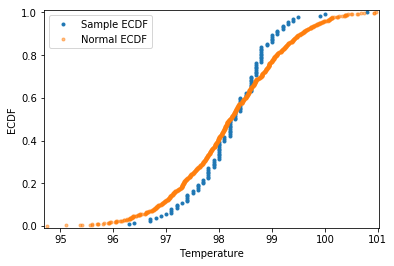

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

In [7]:
# Plot the ECDF of the data.
x,y = ecdf(df.temperature)
plt.plot(x, y, linestyle='none', marker='.')
norm = np.random.normal(np.mean(df.temperature), size=1000)
x,y = ecdf(norm)
plt.plot(x, y, linestyle='none', marker='.', alpha=0.5)
# Formatting
plt.xlabel('Temperature')
plt.ylabel('ECDF')
plt.legend(['Sample ECDF', 'Normal ECDF'], loc='upper left')
plt.margins(0.01)
plt.show()
stats.normaltest(df.temperature)

In [ ]:
#Answer to Question 1
    Distribution is normal. Probability of observing a normal distribution from the population is 26%.


In [ ]:
2. Is the sample size large? Are the observations independent? 

We will examing the data set if the sample size is greater or less than 30. 
We will also examine the data to determine if they are independent (that is, each observation/row is unique).

In [8]:
num_samples = len(df.temperature)
print(num_samples)

130


In [ ]:
#Answer to Question 2 
A sample size greater than 30 is considered large, here we have 130 samples so yes, the sample size is large! 
Given the information we have, it's impossible to know if the observations are independent.

In [11]:
print('The temperature column has', len(df['temperature']), 'observations.')
df.head()

The temperature column has 130 observations.


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [ ]:
3. Is the true population mean really 98.6 degrees F?

First, try a bootstrap hypothesis test. 
Null Hypothesis: True mean population temp = 98.6F
Alternative Hypothesis: True mean population temp ≠ 98.6F
*Would you use a one-sample or two-sample test? Why? 
Because we're given just one sample data set, we will try a one-sample test instead of a two-sample test.
*In this situation, is it appropriate to use the t or z statistic?
T-test, because we're comparing the sample mean to the proposed population mean. Given the data below, 
the t-statistic is 5.45. This means one would observe a mean of 98.6 at 5.45 standard deviations from our sample mean.
Because the P-value is so small, this suggests a very low probability of observing a body temperature of 98.6 or greater.

In [15]:
mu = 98.6

tstat, t_pval = stats.ttest_1samp(a=df['temperature'], popmean=mu)
print('The T-Statistic is %d with a p-value of %s' %(abs(tstat),t_pval))

The T-Statistic is 5 with a p-value of 2.4106320415561276e-07


In [ ]:
3. *Now try using the other test. How is the result be different? Why? 

In [16]:
from statsmodels.stats.weightstats import ztest
z_score, z_pval = ztest(df['temperature'],value=98.6)
print('The Z-Statistic is %d with a p-value of %s' %(abs(z_score),z_pval))

The Z-Statistic is 5 with a p-value of 4.9021570141012155e-08


In [ ]:
The result is the same with the z-stat test. It suggests that a population mean of 98.6 would be observed 
more than 5 standard deviations from a population mean as determined by our sample. The difference in these
two tests lies in the differences in P-values. The z-test returns a smaller P-value than the t-test, meaning
there is an even smaller probability that we would observe a population mean greater than 98.6

In [ ]:
4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

*Which one is the correct one to use?
The correct test to use is the t-test because our sample size is 10. Z-scores are only usable for sample
sizes larger than 30.


In [47]:
# Draw a small sample of size 10 from the data
small_sample = np.random.choice(df['temperature'], size=10, replace=False)
print(small_sample)
from scipy.stats import ttest_1samp
from statsmodels.stats.weightstats import ztest
zt, zp = ztest(small_sample, value=98.6)
tt, tp = ttest_1samp(small_sample, popmean=98.6)
print('p-value for t-test: ', tp, ', and z-test: ', zp)

[98.7 99.1 98.  98.8 98.3 99.  98.7 97.2 98.2 97.7]
p-value for t-test:  0.2617604628821489 , and z-test:  0.23117710850406337


In [ ]:
*What do you notice? What does this tell you about the difference in application of the tt and zz statistic?
Repeated runs of the two tests on this smaller sample size gives lower p-values from the z-test than from the t-test. 
This is likely due to the fact that the t-test takes into account the degrees of freedom (n-1=129 in this case), 
whereas the z-test does not take into account the degrees of freedom. 

If we can assume that the sample standard deviation is the population standard deviation and it is appropriate 
to use the z-test, then we have a higher likelihood of rejecting the null hypothesis.

In [ ]:
5. At what temperature should we consider someone's temperature to be "abnormal"?

Compute the margin of error and confidence interval. 

In [49]:
def calc_pi(data, alpha):
    '''return sample mean + PI for given level'''
    mean = np.mean(data)
    std  = np.std(data)
    error = std * stats.norm.ppf(1 - (1-alpha)/2.)
    return (mean,error)

mean, error = calc_pi(df.temperature, 0.95)   
print('Sample mean is %f +/- %f.' % (mean, error))
print('The 95%% PI is %f to %f.' % (mean-error, mean+error))

normal = ((df.temperature>=(mean-error)) & (df.temperature<=(mean+error))).sum() * 100. / len(df)
print('Of the %i sample temperatures, %2.2f%% are within the interval.' % (len(df), normal) )

Sample mean is 98.249231 +/- 1.431475.
The 95% PI is 96.817756 to 99.680706.
Of the 130 sample temperatures, 93.85% are within the interval.


In [ ]:
This calculation reports that 95% of the population lies between 96.82 and 99.68. 
Temperatures outside this range would be considered "abnormal." 
This is roughly confirmed as we calculate almost 94% of the samples inside this predicted range.

In [ ]:
6. Is there a significant difference between males and females in normal temperature?

What test did you use and why? I'll create 2 new dataframes for gender and then visualize this using a boxplot.
Write a story with your conclusion in the context of the original problem. 

In [50]:
male_df = df[df.gender.str.contains('M')]
female_df = df[df.gender.str.contains('F')]

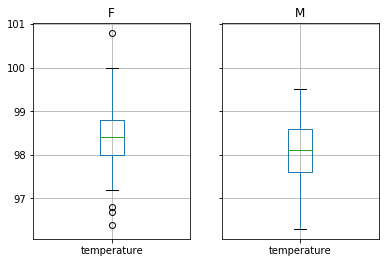

In [51]:
df[['gender', 'temperature']].groupby('gender').boxplot(return_type='axes')
plt.show()

In [ ]:
There's a difference here but the means are both within the IQR (interquartile range) of each other. 
Let's calculate further with a 2-sample t-test with these means we've gathered.

In [52]:
stats.ttest_ind(male_df.temperature, female_df.temperature)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

In [53]:
def calc_ci(data, alpha):
    '''Function to return sample mean and CI for given level'''
    mean = np.mean(data)
    std  = np.std(data)
    std_error = std / np.sqrt(len(data))
    error = std_error * stats.norm.ppf(1 - (1-alpha)/2.)
    return (mean,error)

mean_m, error_m = calc_ci(male_df.temperature, 0.95)
print('Male  \t| Sample mean is %f +/- %f.' % (mean_m, error_m))
print('      \t| The 95%% CI is %f to %f.\n' % (mean_m-error_m, mean_m+error_m))

mean_f, error_f = calc_ci(female_df.temperature, 0.95)
print('Female\t| Sample mean is %f +/- %f.' % (mean_f, error_f))
print('      \t| The 95%% CI is %f to %f.' % (mean_f-error_f, mean_f+error_f))

Male  	| Sample mean is 98.104615 +/- 0.168558.
      	| The 95% CI is 97.936057 to 98.273174.

Female	| Sample mean is 98.393846 +/- 0.179349.
      	| The 95% CI is 98.214497 to 98.573195.


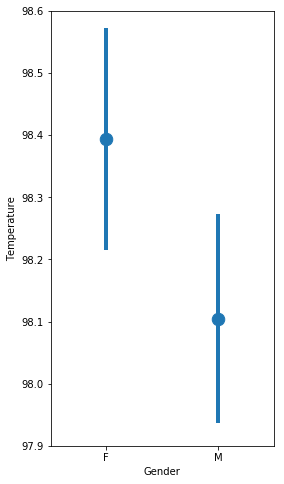

In [55]:
plt.figure(figsize=(4,8))
plt.errorbar(['F','M'], [mean_f, mean_m], [error_f, error_m], marker='.', ms=25, ls='None', lw=4)
plt.margins(0.5)
plt.xlabel('Gender')
plt.ylabel('Temperature')
plt.ylim(97.9,98.6)
plt.show()

In [ ]:
No, there is not a significant difference.